In [2]:
import os
import utilsCM
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import runCV


In [3]:
WIpath = '../../../data-04/'
nsample = 12
WrdThingsInfo = pd.read_csv(WIpath + 'KeptTHINGSInfo_n' + str(nsample) +'.csv',sep=',',index_col = 0)

In [4]:
import numpy as np
Ypredict = 'Word2Sense'

if Ypredict is 'Word2Vec':
    ### Load Word2Vec subset
    filename = 'ThingsWrd2Vec_subset.txt'
    filepath = '../../../data-10/'
    Wrd2Vec = pd.read_csv(filepath + filename,sep=',',index_col = 0)
    Y_embeddings = Wrd2Vec.values[:,:].astype(np.float)
elif Ypredict is 'Word2Sense':
    ### Load Word2Sense subset
    pathtofile = '../../../data-07/'
    Y_embeddings = pd.read_csv(pathtofile + "ThingsWrd2Sns_subset.txt", sep=",",index_col = 0)
    Y_embeddings = Y_embeddings.values[:,:].astype(np.float)

In [8]:
def runCV_execute(pretrained_val,savepath,Ypredict='Word2Sense',keyword={'DNNActvtn','ROIpred'},datapath='../../../data-00/',layer={'conv_1','conv_5','fc_3'},ROI={'EVC','ObjectROI'},Sub=[1,2,3,4],Keepncomps=list(range(2,42,2))):
    
    ### Subset of things info
    
    WIpath = '../../../data-04/'
    nsample = 12
    WrdThingsInfo = pd.read_csv(WIpath + 'KeptTHINGSInfo_n' + str(nsample) +'.csv',sep=',',index_col = 0)
    

    if Ypredict is 'Word2Vec':
        ### Load Word2Vec subset
        filename = 'ThingsWrd2Vec_subset.txt'
        filepath = '../../../data-10/'
        Wrd2Vec = pd.read_csv(filepath + filename,sep=',',index_col = 0)
        Y_embeddings_subset = Wrd2Vec.values[:,:].astype(np.float)
    elif Ypredict is 'Word2Sense':
        ### Load Word2Sense subset
        pathtofile = '../../../data-07/'
        Y_embeddings_subset = pd.read_csv(pathtofile + "ThingsWrd2Sns_subset.txt", sep=",",index_col = 0)
        Y_embeddings_subset = Y_embeddings_subset.values[:,:].astype(np.float)

    for ikeyword in keyword:
        for ilayer in layer:
            if ikeyword is 'ROIpred':
                for iROI in ROI: 
                    savefigname = 'Predict' + Ypredict + '_' + ikeyword + '_' +iROI + '_'+ ilayer
                    for iSub in Sub:
                        Subfile = datapath +  "ROIpred_Sub" + str(iSub) + '_' + iROI + "_" + ilayer 
                        if not pretrained_val:
                            Subfile = Subfile + '_untrained'
                        thisSub = np.load(Subfile + '.npy')
                        if iSub is 1:
                            predictor_variable_sub = thisSub
                        else:
                            predictor_variable_sub = np.append( predictor_variable_sub , thisSub, axis = 1)


                    runCV.iterOverPCs(Keepncomps,pretrained_val,savepath,predictor_variable_sub,Y_embeddings_subset,ikeyword,ilayer,Ypredict,iROI)

            elif ikeyword is 'DNNActvtn':

                predictor_variable_file = datapath +  "things_" + ilayer 
                if not pretrained_val:
                    predictor_variable_file = predictor_variable_file + '_untrained'

                
                predictor_variable_sub = pd.read_csv(predictor_variable_file + '.csv', header=None, index_col=0).iloc[:,:].to_numpy()            
                predictor_variable_sub = predictor_variable_sub[WrdThingsInfo['old_index']]


                runCV.iterOverPCs(Keepncomps,pretrained_val,savepath,predictor_variable_sub,Y_embeddings_subset,ikeyword,ilayer,Ypredict)

In [9]:
Ypredict = 'Word2Sense'
keyword = {'ROIpred'}
layer =  {'conv_5'}
Sub = [1,2,3,4]
ROI = {'EVC','ObjectROI','SceneROI'}
Keepncomps = list(range(2,42,2))

pretrained_val = True
datapath='../../../data-14/'
savepath = '../../../data-16/' 

In [10]:

runCV_execute(pretrained_val,savepath,Ypredict='Word2Sense',datapath=datapath,keyword=keyword,ROI=ROI,Sub=Sub,layer=layer,Keepncomps=Keepncomps)



PredictWord2Sense_ROIpred_ObjectROI_conv_5_2PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_4PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_6PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_8PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_10PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_12PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_14PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_16PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_18PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_20PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_22PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_24PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_26PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_28PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_30PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_32PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_34PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_36PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_38PCs
PredictWord2Sense_ROIpred_ObjectROI_conv_5_40PCs
PredictWord2Sense_ROIpre

In [11]:
def buildDict(datapath,figurepath,Ypredict='Word2Sense',setbonf = True, keyword={'ROIpred','DNNActvtn'},layer={'conv_5'},ROI={'EVC','ObjectROI'},Sub=[1,2,3,4],Keepncomps=list(range(2,42,2)),pretrained_val = True,RandomWs=False):
    if Ypredict is 'Word2Sense':
        ### Load Word2Vec subset
        filename = 'ThingsWrd2Vec_subset.txt'
        filepath = '../../../data-10/'
        Wrd2Vec = pd.read_csv(filepath + filename,sep=',',index_col = 0)
        Y_embeddings_subset = Wrd2Vec.values[:,:].astype(np.float)
        Y_embeddings_subset
    elif Ypredict is 'Word2Vec':
        ### Load Word2Sense subset
        pathtofile = '../../../data-07/'
        Y_embeddings_subset = pd.read_csv(pathtofile + "ThingsWrd2Sns_subset.txt", sep=",",index_col = 0)

    if setbonf:
        tresh_bonf = utilsCM.p2r(.05/Y_embeddings_subset.shape[1], Y_embeddings_subset.shape[0])
    else:
        tresh_bonf = 0

    myDict_count = {}
    myDict_mean = {}
    myDict_max = {}
    myDict_median = {}

    RandomWs_val = RandomWs

    for ilayer in layer:
        for ikeyword in keyword:            
            for icomps in Keepncomps:
                thisPrediction = []               
                if ikeyword is 'DNNActvtn':
                    filename = 'Predict' + Ypredict + '_' + ikeyword + '_'+ ilayer + '_'+ str(icomps) +'PCs'
                    DictKey = ikeyword
                    filename, DictKey = runCV.completeName(pretrained_val,filename,DictKey)
                    myDict_count,myDict_mean,myDict_max,myDict_median = runCV.buldDict_execute(datapath,DictKey,filename,tresh_bonf,myDict_count,myDict_mean,myDict_max,myDict_median)  
                    
                elif ikeyword is 'ROIpred':  
                    # for RandomWs_val in RandomWs:  

                    for iROI in ROI:
                        filename = 'Predict' + Ypredict + '_' + ikeyword + '_' +iROI + '_'+ ilayer + '_'+ str(icomps) +'PCs'
                        DictKey = iROI
                        filename, DictKey = runCV.completeName(pretrained_val,filename,DictKey,RandomWs_val)
                        myDict_count,myDict_mean,myDict_max,myDict_median = runCV.buldDict_execute(datapath,DictKey,filename,tresh_bonf,myDict_count,myDict_mean,myDict_max,myDict_median)
        
    myDict_count['PCs'] = []
    myDict_mean['PCs'] = []
    myDict_max['PCs'] = []
    myDict_median['PCs'] = []
    myDict_count['Metric'] = []
    myDict_mean['Metric'] = []
    myDict_max['Metric'] = []
    myDict_median['Metric'] = []
    for i in Keepncomps:
        myDict_count['PCs'].append(i)
        myDict_mean['PCs'].append(i)
        myDict_max['PCs'].append(i)
        myDict_median['PCs'].append(i)
        myDict_count['Metric'].append('count')
        myDict_mean['Metric'].append('mean')
        myDict_max['Metric'].append('max')
        myDict_median['Metric'].append('median')

    return myDict_median,myDict_max,myDict_count,myDict_mean

In [12]:
from  matplotlib import pyplot
import seaborn as sns
from pandas import DataFrame as pddf

datapath = '../../../data-16/'
figurepath = '../../../figures-16/'

keyword={'ROIpred'}
# pretrained_vec = [True, False]
layer={'conv_5'}

In [13]:
myDict_median,myDict_max,myDict_count,myDict_mean = buildDict(datapath,figurepath,setbonf = True,Ypredict='Word2Sense',keyword=keyword,ROI = ROI,layer=layer,Keepncomps=Keepncomps)


In [14]:
df_count = pddf.from_dict(myDict_count).set_index('PCs')
df_mean = pddf.from_dict(myDict_mean).set_index('PCs')
df_max = pddf.from_dict(myDict_max).set_index('PCs')
df_median = pddf.from_dict(myDict_median).set_index('PCs')

In [15]:
allvalues = pd.concat([df_count, df_mean,df_max,df_median], axis=0)

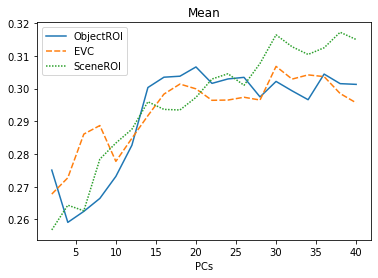

In [16]:
import matplotlib.pyplot as plt

sns.lineplot(data= allvalues[allvalues['Metric'] == 'mean'].iloc[:,0:4]).set_title('Mean')
plt.savefig(figurepath + "Mean.png")

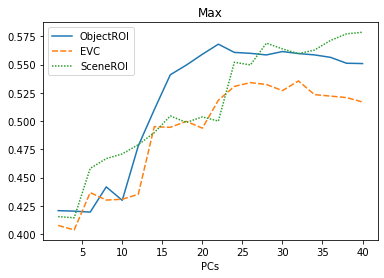

In [17]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'max'].iloc[:,0:4]).set_title('Max')
plt.savefig(figurepath + "Max.png")

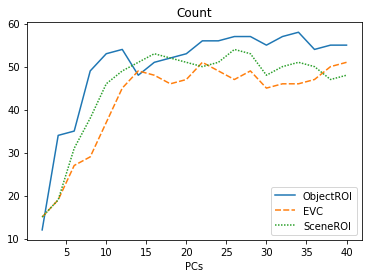

In [18]:
sns.lineplot(data= allvalues[allvalues['Metric'] == 'count'].iloc[:,0:4]).set_title('Count')
plt.savefig(figurepath + "Count.png")

In [19]:
icomps = 16
Ypredict = 'Word2Sense'

datapath = '../../../data-16/'
savepath = '../../../data-16/'

In [20]:
if Ypredict is 'Word2Vec':
    ### Load Word2Vec subset
    filename = 'ThingsWrd2Vec_subset.txt'
    filepath = '../../../data-10/'
    Wrd2Vec = pd.read_csv(filepath + filename,sep=',',index_col = 0)
    Y_embeddings = Wrd2Vec.values[:,:].astype(np.float)
elif Ypredict is 'Word2Sense':
    ### Load Word2Sense subset
    pathtofile = '../../../data-07/'
    Y_embeddings_csv = pd.read_csv(pathtofile + "ThingsWrd2Sns_subset.txt", sep=",",index_col = 0)
    Y_embeddings = Y_embeddings_csv.values[:,:].astype(np.float)

In [21]:
#Only the subset
WrdThingspath = '../../../data-04/'
nsample = 12
WrdThingsInfo = pd.read_csv(WrdThingspath + 'KeptTHINGSInfo_n' + str(nsample) +'.csv',sep=',',index_col = 0)


##reset the index
Y_embeddings_csv = Y_embeddings_csv.set_index(WrdThingsInfo.Word)

In [22]:
import csv

##Showing histograms for senses above threshold
myDict = {}

for ilayer in layer:
    
    for ikeyword in keyword:        
        thisPrediction = []
        if ikeyword is 'ROIpred':
            for iROI in ROI:
                thisPrediction = []
                if not pretrained_val:
                    filename = 'Predict' + Ypredict + '_' + ikeyword + '_' +iROI + '_'+ ilayer + '_'+ str(icomps) +'PCs_untrained'
                    csvfilename = savepath + ikeyword + "_" + iROI +'_' + ilayer + '_'+ str(icomps) +'PCs_untrained.csv'
                else:
                    filename = 'Predict' + Ypredict + '_' + ikeyword + '_' +iROI + '_'+ ilayer + '_'+ str(icomps) +'PCs'
                    csvfilename = savepath + ikeyword + "_" + iROI +'_' + ilayer + '_'+ str(icomps) +'PCs.csv'

                    
                thisPrediction = np.load(datapath + filename + '.npy')
                    
                sortedIndeces = np.argsort(thisPrediction)[::-1][0:9] #first 10 senses indeces, from highest to least hgih
                Subset_W2S = Y_embeddings_csv.iloc[:,sortedIndeces]#eliminate rows of zeros
                WeightedWords_rows = (Subset_W2S != 0).any(axis=1)
                new_W2S = Y_embeddings_csv.loc[WeightedWords_rows] #takes them off from dataset

                listOfWeights = []
                count = 0
                for i in sortedIndeces:
                    count += 1
                    listOfWeights.append("Top "+ str(count) + " Sense " + str(i))
                    listOfWeights.append(new_W2S.iloc[:,i].sort_values(0)[::-1][0:9])
                                    
                with open(csvfilename, 'w', newline='') as csvfile:
                    wr = csv.writer(csvfile, quoting=csv.QUOTE_ALL)
                    wr.writerow(listOfWeights)


In [23]:
sortedIndeces

array([120,  84,  60,  37,  55, 106,  43,   3,  12])